##Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Loading the dataset

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Bonus Project/Dataset.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.shape

(10683, 11)

###Dropping the rows with null values in some features

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(10682, 11)

In [ ]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


###Viewing the number of unique values in the dataset

In [ ]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    15

###viewing and dropping the duplicate values

In [ ]:
df.duplicated().sum()

220

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.shape

(10462, 11)

###Preprocessing

In [ ]:
def change_into_datetime(df,col):
  df[col]=pd.to_datetime(df[col])

In [ ]:
dt_cols=['Date_of_Journey','Dep_Time','Arrival_Time']
for i in dt_cols:
  change_into_datetime(df,i) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 980.8+ KB


In [ ]:
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
df['Day'].head()

0    24
1     5
2     6
3     5
4     3
Name: Day, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Source           10462 non-null  object        
 2   Destination      10462 non-null  object        
 3   Route            10462 non-null  object        
 4   Dep_Time         10462 non-null  datetime64[ns]
 5   Arrival_Time     10462 non-null  datetime64[ns]
 6   Duration         10462 non-null  object        
 7   Total_Stops      10462 non-null  object        
 8   Additional_Info  10462 non-null  object        
 9   Price            10462 non-null  int64         
 10  Day              10462 non-null  int64         
 11  Month            10462 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.0+ MB


In [ ]:
def extract_hm(data,col):
    data[col+'_hour']=data[col].dt.hour
    data[col+'_min']=data[col].dt.minute
    data.drop(col,axis=1,inplace=True)
    
    

In [ ]:
#extracting hours and minutes and then dropping the Dep_time column
extract_hm(df,'Dep_Time')

In [ ]:
#extracting hours and minutes and then dropping the Arrival_time column
extract_hm(df,'Arrival_Time')

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    elif 'h' in duration[i]:
        duration[i]=duration[i] + ' 0m'
    else:
        duration[i]='0h '+ duration[i]

In [ ]:
df['Duration']=duration

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
h=lambda x: x.split(' ')[0][0:-1]
m=lambda x: x.split(' ')[1][0:-1]

In [ ]:
df['dur_hour']=df['Duration'].apply(h)
df['dur_min']=df['Duration'].apply(m)

In [ ]:
df['dur_hour'].head(),df['dur_min'].head()

(0     2
 1     7
 2    19
 3     5
 4     4
 Name: dur_hour, dtype: object, 0    50
 1    25
 2     0
 3    25
 4    45
 Name: dur_min, dtype: object)

In [ ]:
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Route              10462 non-null  object
 4   Total_Stops        10462 non-null  object
 5   Additional_Info    10462 non-null  object
 6   Price              10462 non-null  int64 
 7   Day                10462 non-null  int64 
 8   Month              10462 non-null  int64 
 9   Dep_Time_hour      10462 non-null  int64 
 10  Dep_Time_min       10462 non-null  int64 
 11  Arrival_Time_hour  10462 non-null  int64 
 12  Arrival_Time_min   10462 non-null  int64 
 13  dur_hour           10462 non-null  object
 14  dur_min            10462 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [ ]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
categorical_column=[column for column in df.columns if df[column].dtype=='object']
categorical_column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'Day',
 'Month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [ ]:
categorical = df[categorical_column]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)


In [ ]:
categorical['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
source=pd.get_dummies(categorical['Source'],drop_first=True)


In [ ]:
categorical['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
destination=pd.get_dummies(categorical['Destination'],drop_first=True)


In [ ]:
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
categorical.drop('Route',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3475
Route4              9100
Route5             10418
dtype: int64

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [ ]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=le.fit_transform(categorical[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical.drop('Additional_Info',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
categorical['Total_Stops']


0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

In [ ]:
categorical.drop('Source',axis=1,inplace=True)
categorical.drop('Destination',axis=1,inplace=True)
categorical.drop('Airline',axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [ ]:
df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [ ]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


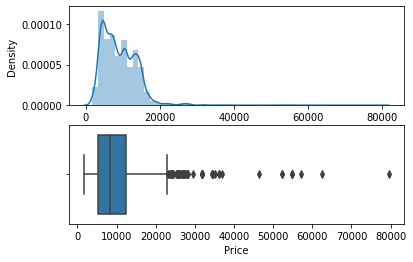

In [ ]:
plot(df,'Price')

###Removing the outliers

In [ ]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


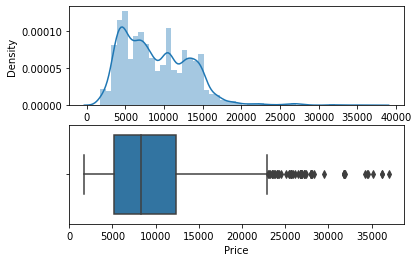

In [ ]:
plot(df,'Price')

###Generating the predictor and response variables

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=188)

In [ ]:
X_train

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
3212,2,0,9,1,6,5,1,0,0,0,...,0,1,21,3,5,50,16,20,10,30
1500,1,3,7,6,13,5,0,0,0,0,...,0,0,5,9,10,20,1,30,15,10
8822,0,0,13,29,13,5,0,0,0,1,...,0,1,24,3,2,0,4,45,2,45
4322,1,3,7,6,13,5,0,0,0,1,...,0,0,27,6,8,0,19,0,11,0
9100,1,3,7,6,13,5,0,0,1,0,...,0,0,15,6,18,35,1,30,6,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1,0,7,8,13,5,0,0,0,1,...,0,1,3,12,18,55,12,25,17,30
3879,0,2,5,29,13,5,0,0,1,0,...,0,0,5,3,22,15,0,50,2,35
6337,2,3,28,4,5,5,0,0,0,1,...,0,0,6,6,9,40,12,35,26,55
8115,1,3,7,6,13,5,0,0,0,0,...,0,0,6,3,8,45,19,15,10,30


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    r2score=r2_score(y_test,predictions) 
    print("R2 score is: {}".format(r2score))
          
    print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test,predictions)))
    print('Mean Sqaured Error:{}'.format(mean_squared_error(y_test,predictions)))
    print('Root Mean Sqauared Error:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

Model is: RandomForestRegressor()
Training score: 0.951530593684892
R2 score is: 0.850184992527996
Mean Absolute Error:1109.0552064855433
Mean Sqaured Error:2977368.9984193975
Root Mean Sqauared Error:1725.5054327412004


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


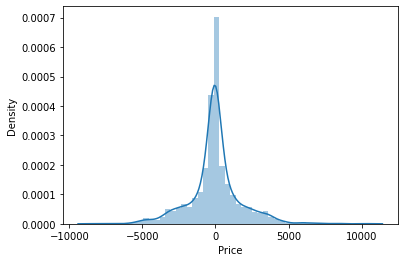

In [ ]:
predict(RandomForestRegressor())

Model is: LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training score: 0.3441271358585255
R2 score is: 0.5034278028987984
Mean Absolute Error:1891.7988533205923
Mean Sqaured Error:9868695.333492594
Root Mean Sqauared Error:3141.4479676564106


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


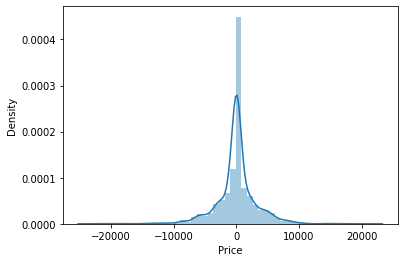

In [ ]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7726743624451888
R2 score is: 0.6755637909083818
Mean Absolute Error:1695.564166268514
Mean Sqaured Error:6447727.281892021
Root Mean Sqauared Error:2539.2375394775536


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


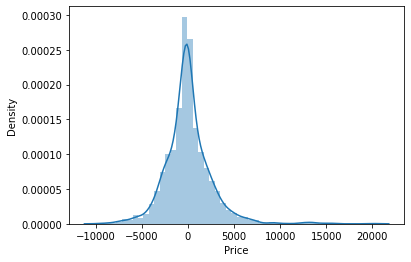

In [ ]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9661804759486057
R2 score is: 0.7498062696025629
Mean Absolute Error:1295.7680681637203
Mean Sqaured Error:4972259.248616553
Root Mean Sqauared Error:2229.85632914243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


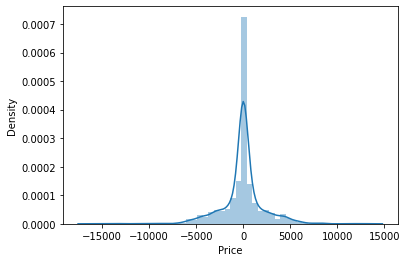

In [ ]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.04447029249685408
R2 score is: 0.050861081301452615
Mean Absolute Error:3450.3336667816843
Mean Sqaured Error:18862841.843494534
Root Mean Sqauared Error:4343.137327266378


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


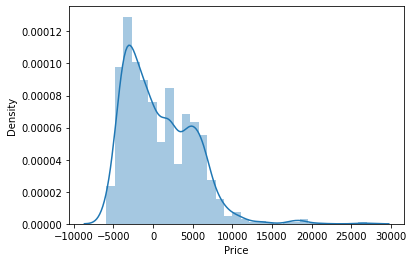

In [ ]:
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7996748358123809
R2 score is: 0.8063401522873317
Mean Absolute Error:1430.8500272556832
Mean Sqaured Error:3848725.415082793
Root Mean Sqauared Error:1961.8168658370723


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


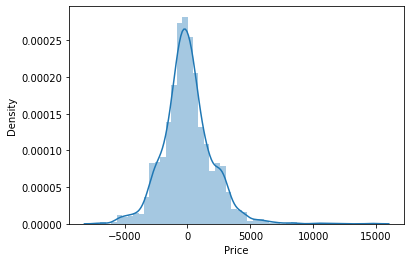

In [ ]:
predict(GradientBoostingRegressor())

In [ ]:
import xgboost as xgb
xg_reg=xgb.XGBRegressor()

In [ ]:
xg_reg.fit(X_train.values,y_train.values)
pred=xg_reg.predict(X_test.values)
r2_score(y_test.values,pred)

[19:09:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8032611246582925

###Logistic Regression and KNearest Neighbors give very low r2 scores.
###So there is no point in tuning their hyperparameters

###Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(X_train,y_train)

array([2.28693135e+00, 2.09756655e+00, 2.86280368e+00, 2.39541422e+00,
       1.64459613e+00, 8.78802696e-01, 7.79589237e-01, 8.75942140e-02,
       7.55026780e-01, 9.75342581e-01, 1.18917915e-03, 6.24737905e-01,
       0.00000000e+00, 3.31889559e-01, 0.00000000e+00, 2.21870893e-01,
       1.14949466e-02, 1.92223801e-01, 1.71071054e+00, 9.02845717e-01,
       2.97166851e-01, 1.69031084e+00, 4.41122117e-01, 2.99810696e-01,
       1.85704596e-01, 3.65381939e-01, 1.06298138e+00, 7.90862862e-01,
       1.40317835e+00, 1.15350341e+00, 1.81812111e+00, 1.46863257e+00,
       1.80636213e+00, 1.07303879e+00])

In [ ]:
fs=pd.DataFrame(mutual_info_classif(X_train,y_train),index=X_train.columns)

In [ ]:
fs

,0
Total_Stops,2.344560
Route1,2.150463
Route2,2.856907
Route3,2.399969
Route4,1.692350
Route5,0.838682
Air India,0.794863
GoAir,0.097202
IndiGo,0.774709
Jet Airways,0.943221


In [ ]:
fs.columns=['important_features']
fs.sort_values(by='important_features',ascending=False)

,important_features
Route2,2.856907
Route3,2.399969
Total_Stops,2.344560
Route1,2.150463
dur_hour,1.806289
Arrival_Time_hour,1.773472
Cochin,1.703363
Route4,1.692350
Delhi,1.676496
Arrival_Time_min,1.480381


###We can drop the features with values less than 0.5


In [ ]:
X_train_fs=X_train.drop(['Delhi','New Delhi','SpiceJet','Hyderabad','Mumbai','Vistara','Chennai','Kolkata','GoAir','Vistara Premium economy','Multiple carriers Premium economy','Trujet','Jet Airways Business'],axis=1)
X_test_fs=X_test.drop(['Delhi','New Delhi','SpiceJet','Hyderabad','Mumbai','Vistara','Chennai','Kolkata','GoAir','Vistara Premium economy','Multiple carriers Premium economy','Trujet','Jet Airways Business'],axis=1)

In [ ]:
X_train_fs

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,IndiGo,Jet Airways,Multiple carriers,Cochin,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
3212,2,0,9,1,6,5,1,0,0,0,0,21,3,5,50,16,20,10,30
1500,1,3,7,6,13,5,0,0,0,1,1,5,9,10,20,1,30,15,10
8822,0,0,13,29,13,5,0,0,1,0,0,24,3,2,0,4,45,2,45
4322,1,3,7,6,13,5,0,0,1,0,1,27,6,8,0,19,0,11,0
9100,1,3,7,6,13,5,0,1,0,0,1,15,6,18,35,1,30,6,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1,0,7,8,13,5,0,0,1,0,0,3,12,18,55,12,25,17,30
3879,0,2,5,29,13,5,0,1,0,0,0,5,3,22,15,0,50,2,35
6337,2,3,28,4,5,5,0,0,1,0,1,6,6,9,40,12,35,26,55
8115,1,3,7,6,13,5,0,0,0,1,1,6,3,8,45,19,15,10,30


In [ ]:
X_test_fs

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,IndiGo,Jet Airways,Multiple carriers,Cochin,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
10057,0,1,19,29,13,5,0,0,0,0,0,6,1,5,45,7,15,1,30
4347,1,0,3,8,13,5,0,0,1,0,0,3,12,5,50,12,20,6,30
8618,1,2,7,3,13,5,0,0,1,0,0,6,9,16,30,4,40,12,10
1338,0,0,13,29,13,5,0,1,0,0,0,24,5,8,30,11,20,2,50
6792,0,2,5,29,13,5,0,0,0,0,0,15,5,19,55,22,25,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,1,2,33,3,13,5,1,0,0,0,0,18,5,14,35,14,35,24,0
9860,0,0,13,29,13,5,0,0,1,0,0,18,4,11,10,14,5,2,55
10073,0,0,13,29,13,5,0,1,0,0,0,18,4,10,10,13,0,2,50
6160,1,2,14,3,13,5,0,0,1,0,0,5,1,9,35,19,10,9,35


In [ ]:
def pipeline_fs(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train_fs,y_train)
    print("Training score: {}".format(model.score(X_train_fs,y_train)))
    predictions = model.predict(X_test_fs)
    r2score=r2_score(y_test,predictions) 
    print("R2 score is: {}".format(r2score))
          
    print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test,predictions)))
    print('Mean Sqaured Error:{}'.format(mean_squared_error(y_test,predictions)))
    print('Root Mean Sqauared Error:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: RandomForestRegressor()
Training score: 0.9472780180084136
R2 score is: 0.8432593275456675
Mean Absolute Error:1135.4177740135988
Mean Sqaured Error:3115007.1466915384
Root Mean Sqauared Error:1764.938284102744


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


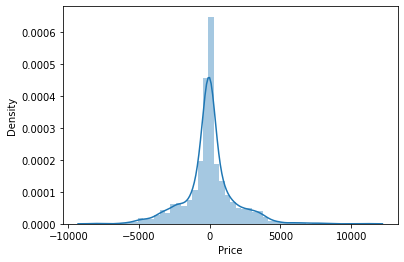

In [ ]:
pipeline_fs(RandomForestRegressor())

Model is: KNeighborsRegressor()
Training score: 0.7704002897332461
R2 score is: 0.6747192431518301
Mean Absolute Error:1700.1514572384137
Mean Sqaured Error:6464511.516999521
Root Mean Sqauared Error:2542.5403668377658


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


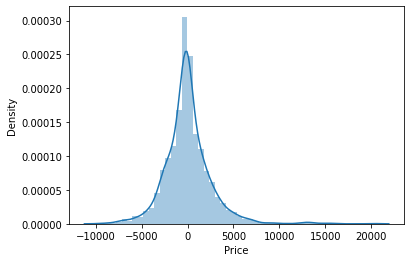

In [ ]:
pipeline_fs(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9625799157699435
R2 score is: 0.7488581749514254
Mean Absolute Error:1303.3681637203374
Mean Sqaured Error:4991101.337066147
Root Mean Sqauared Error:2234.07728985954


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


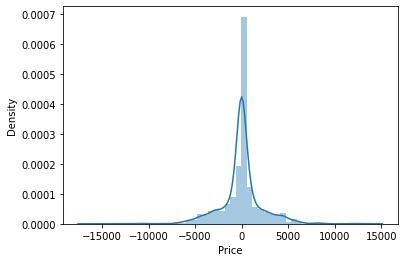

In [ ]:
pipeline_fs(DecisionTreeRegressor())

###Using XGBoosts DMatrix which will convert the dataset into a data structure known as DMatrix that XGBoost supports and gives its acclaimed performance and efficiency gains.

In [ ]:
import xgboost as xgb

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train_fs,label=y_train)
xg_reg=xgb.XGBRegressor(max_depth=7)

In [ ]:
xg_reg.fit(X_train_fs.values,y_train.values)

[19:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=7)

In [ ]:
preds=xg_reg.predict(X_test_fs.values)

In [ ]:
r2_score(y_test,preds)

0.8708985564588478

###We can see that after the removal of the features the r2score almost remains the same for Random Forest Regressor, Decision Tree Regressor,K Nearest Neighbors and Gradient Boosting but their is a slight increase of r2score in XGBRegressor after the least usable features are dropped